In [1]:
from astropy.io import fits

fits_file = fits.open('ceers_nircam10_f277w_v1_mbkgsub1.fits')

fits_file.info()

Filename: ceers_nircam10_f277w_v1_mbkgsub1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     372   ()      
  1  SCI_BKSUB     1 ImageHDU        75   (10500, 4800)   float64   
  2  SCI           1 ImageHDU        75   (10500, 4800)   float32   
  3  ERR           1 ImageHDU        10   (10500, 4800)   float32   
  4  CON           1 ImageHDU        10   (10500, 4800, 1)   int32   
  5  WHT           1 ImageHDU         9   (10500, 4800)   float32   
  6  VAR_POISSON    1 ImageHDU         9   (10500, 4800)   float32   
  7  VAR_RNOISE    1 ImageHDU         9   (10500, 4800)   float32   
  8  VAR_FLAT      1 ImageHDU         9   (10500, 4800)   float32   
  9  HDRTAB        1 BinTableHDU    838   6R x 414C   [23A, 5A, 3A, 56A, 7A, 13A, 3A, D, 6A, 7A, 10A, 4A, L, D, D, D, D, 4A, 19A, 62A, 22A, 3A, D, 20A, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 32A, 24A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 29A, 1A, 5A, D, D, D

In [2]:
from Photutils import *

In [3]:
image = ImageFromFITS(img_file='ceers_nircam10_f277w_v1_mbkgsub1.fits', img_name='NIRCAM10_F277W', 
                           idata={'sci_bkgsub': 1, 'bkg_sub': 11, 'wht': 5, 'err_tot': 3}, 
                           mask=None, mask_edge_thickness=10)

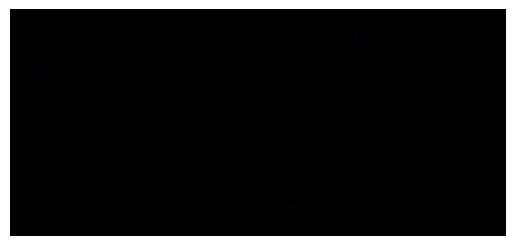

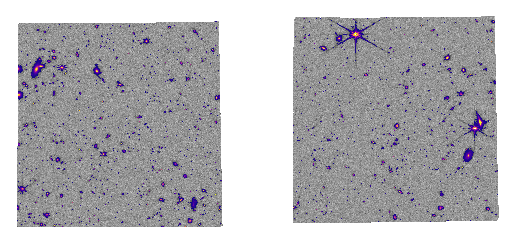

In [4]:
make_img_panel(image)
make_significance_panel(image)

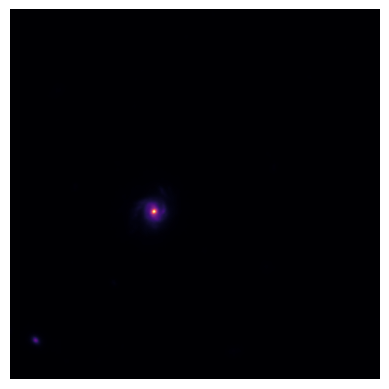

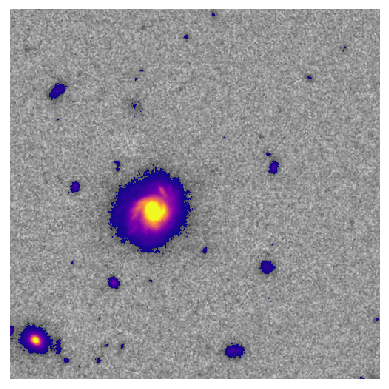

In [5]:
cutout=make_cutout(image, rowmin=2100, rowmax=2600, colmin=8000, colmax=8500)
make_img_panel(cutout)
make_significance_panel(cutout)

In [6]:
morphologies = process_image_morphology(cutout, ['concentration', 'asymmetry', 'smoothness', 'gini'], 1.5, 5, 16, 0.1, 
                                        labels=None, connectivity=8, mode='exponential', smooth_data=True, 
                                        kernel_name='Tophat', smooth_fwhm=3, kernel_size=5, relabel=True, nproc=1, 
                                        progress_bar=True, show_plots=False, psf=None, cutout_extent=2.5, min_cutout_size=48, 
                                        n_sigma_outlier=10, annulus_width=1.0, eta=0.2, petro_fraction_gini=0.2, 
                                        skybox_size=32, petro_extent_cas=1.5, petro_fraction_cas=0.25, boxcar_size_mid=3.0, 
                                        niter_bh_mid=5, sigma_mid=1.0, petro_extent_flux=2.0, boxcar_size_shape_asym=3.0, 
                                        sersic_fitting_args=None, sersic_model_args=None, sersic_maxiter=None, 
                                        include_doublesersic=False, doublesersic_rsep_over_rhalf=2.0, 
                                        doublesersic_tied_ellip=False, doublesersic_fitting_args=None, 
                                        doublesersic_model_args=None, segmap_overlap_ratio=0.25, verbose=False)

print(morphologies['concentration'])
print(morphologies['asymmetry'])
print(morphologies['smoothness'])
print(morphologies['gini'])

Deblending:   0%|          | 0/19 [00:00<?, ?it/s]

[2.408103034605949, 3.6901209530672223, 2.4233860662930806, 2.837693878666146, 2.5978468325023547, 3.8901965424707057, 2.556368190017965, 2.584724594385202, 2.449103326825666, 3.013530286850945, 2.9276770900550657, 2.4864171591755784, 2.602433160471752, 2.230117233427256, 3.6950326957826984, 3.4276039773147065, 2.254617137438049, 2.6317939423620462, 2.356101647160238, 2.5912917724988596, 2.4342472009565843]
[0.07936749115357981, 0.13543558169715958, 0.01652683979107279, 0.03396752306182515, -0.01725342732467045, 0.3223186680064583, -0.14932777888506568, -0.04705441726083534, -0.02005638951727829, 0.197966317612683, -0.014557548760039734, 0.042542325284456305, 0.05803645408377463, 0.2148577501093533, -0.058558728603303876, 0.07736422514289103, -0.02608016782408834, -0.06463994828615341, -0.061390107139523746, -0.037326168080757643, -0.3536289807736801]
[0.0, -1.2271448083217815, 0.0017621838550337947, 0.06736013779863798, 0.016394377334134153, -0.8127681625134506, 0.0, 0.060716122410660

In [7]:
photometry = process_image_photometry(cutout, ['centroid', 'segment_flux', 'gini'], 1.5, 5, 16, 0.1, (2.5, 1.4, 0.0), 
                                      labels=None, connectivity=8, mode='exponential', local_bkg_width=0, 
                                      apermask_method='correct', smooth_data=True, kernel_name='Tophat', smooth_fwhm=3, 
                                      kernel_size=5, detection_cat=None, relabel=True, wcs='None', nproc=1, progress_bar=True, 
                                      show_plots=False)

print(photometry['centroid'])
print(photometry['segment_flux'])
print(photometry['gini'])

Deblending:   0%|          | 0/19 [00:00<?, ?it/s]

[[118.95279201  24.23539132]
 [ 75.89909579  24.21739405]
 [302.51212603  37.27103229]
 [ 34.68881811  51.81225398]
 [151.27624087  43.59348199]
 [  1.74685332  65.00557228]
 [495.31601659  80.11830921]
 [139.89483436 129.61949717]
 [346.82689644 150.72904017]
 [193.13997366 225.96654756]
 [262.6814723  173.3769593 ]
 [ 87.64582822 259.14486997]
 [356.10350508 285.47092177]
 [144.96448663 282.83509635]
 [145.29136701 290.82398687]
 [348.59943874 303.50850313]
 [167.54062493 368.18739606]
 [ 63.73309513 388.80327455]
 [404.07428537 407.18864964]
 [237.54366557 462.12926466]
 [274.28451885 491.97902657]]
[5.99493180e-01 8.16961799e-01 1.20694146e+01 1.87146550e+02
 3.09847909e-01 2.24678259e+00 1.63243195e-01 9.89774192e+00
 6.56459126e+00 2.20781598e+03 7.14687825e-01 5.83782458e+00
 5.72928773e+00 3.37394999e-01 5.60282925e-01 3.07659079e-01
 1.69957177e-01 7.54632565e+00 3.28129057e-01 4.48574385e-01
 1.15947982e-01]
[0.15411866 0.22324473 0.28843607 0.70344784 0.12291165 0.36981566
 

In [8]:
process_image_number_counts(cutout, 1.5, 5, 16, 0.1, labels=None, connectivity=8, mode='exponential', smooth_data=True, 
                            kernel_name='Tophat', smooth_fwhm=3, kernel_size=5, relabel=True, nproc=1, progress_bar=True, 
                            show_plots=False)

Deblending:   0%|          | 0/19 [00:00<?, ?it/s]

21

In [9]:
process_images_morphology(cutout, [cutout], ['concentration', 'asymmetry', 'smoothness', 'gini'], 1.5, 5, 16, 0.1, 
                          'test_morph.h5', labels=None, connectivity=8, mode='exponential', smooth_data=True, 
                          kernel_name='Tophat', smooth_fwhm=3, kernel_size=5, relabel=True, nproc=1, progress_bar=True, 
                          show_plots=False, psf=None, cutout_extent=2.5, min_cutout_size=48, n_sigma_outlier=10, 
                          annulus_width=1.0, eta=0.2, petro_fraction_gini=0.2, skybox_size=32, petro_extent_cas=1.5, 
                          petro_fraction_cas=0.25, boxcar_size_mid=3.0, niter_bh_mid=5, sigma_mid=1.0, petro_extent_flux=2.0, 
                          boxcar_size_shape_asym=3.0, sersic_fitting_args=None, sersic_model_args=None, sersic_maxiter=None, 
                          include_doublesersic=False, doublesersic_rsep_over_rhalf=2.0, doublesersic_tied_ellip=False, 
                          doublesersic_fitting_args=None, doublesersic_model_args=None, segmap_overlap_ratio=0.25, 
                          verbose=False)

Deblending:   0%|          | 0/19 [00:00<?, ?it/s]

In [10]:
import h5py

# Open the HDF5 file
with h5py.File('test_morph.h5', 'r') as f:
    # Print all group names
    def print_attrs(name, obj):
        print(f"{name}")
        for key, val in obj.attrs.items():
            print(f"  {key}: {val}")

    f.visititems(print_attrs)

Morph
Morph/Detection_Image
Morph/Detection_Image/cutout_image
Morph/Detection_Image/cutout_image/segmentation_map
Morph/Filter_Images
Morph/Filter_Images/cutout_image
Morph/Filter_Images/cutout_image/asymmetry
Morph/Filter_Images/cutout_image/concentration
Morph/Filter_Images/cutout_image/gini
Morph/Filter_Images/cutout_image/smoothness


Deblending:   0%|          | 0/19 [00:00<?, ?it/s]

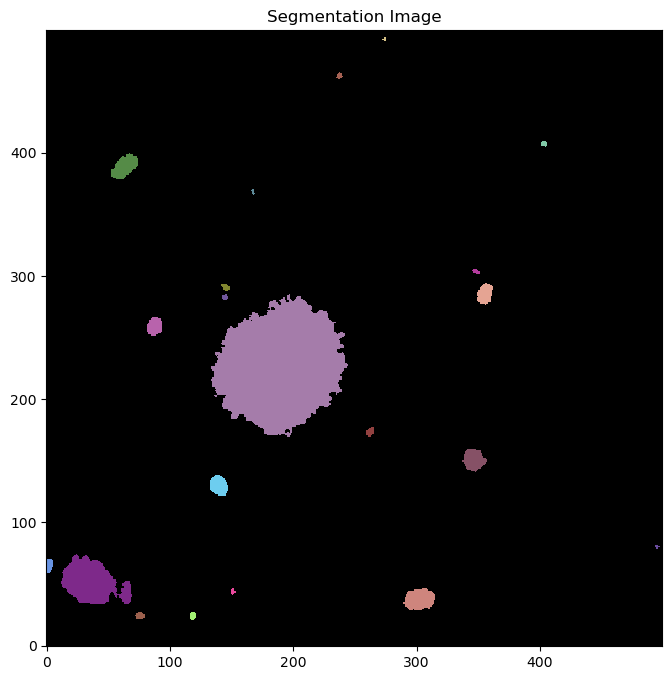

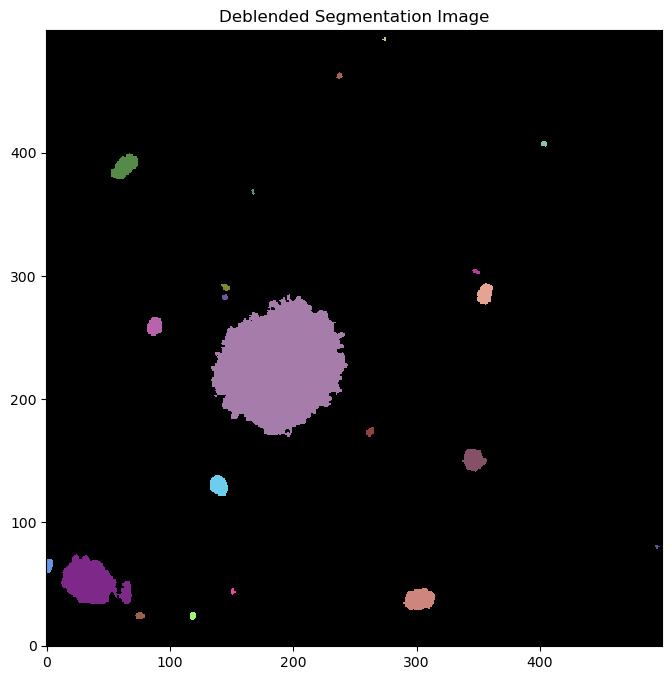

In [11]:
process_images_photometry(cutout, [cutout], ['centroid', 'segment_flux', 'gini'], 1.5, 5, 16, 0.1, (2.5, 1.4, 0.0), 
                          'test_phot.h5', labels=None, connectivity=8, mode='exponential', local_bkg_width=0, 
                          apermask_method='correct', smooth_data=True, kernel_name='Tophat', smooth_fwhm=3, kernel_size=5, 
                          detection_cat=None, relabel=True, wcs='None', nproc=1, progress_bar=True, show_plots=True)

In [12]:
import h5py

# Open the HDF5 file
with h5py.File('test_phot.h5', 'r') as f:
    # Print all group names
    def print_attrs(name, obj):
        print(f"{name}")
        for key, val in obj.attrs.items():
            print(f"  {key}: {val}")

    f.visititems(print_attrs)

Photo
Photo/Detection_Image
Photo/Detection_Image/cutout_image
Photo/Detection_Image/cutout_image/segmentation_map
Photo/Filter_Images
Photo/Filter_Images/cutout_image
Photo/Filter_Images/cutout_image/centroid
Photo/Filter_Images/cutout_image/gini
Photo/Filter_Images/cutout_image/segment_flux


Deblending:   0%|          | 0/19 [00:00<?, ?it/s]

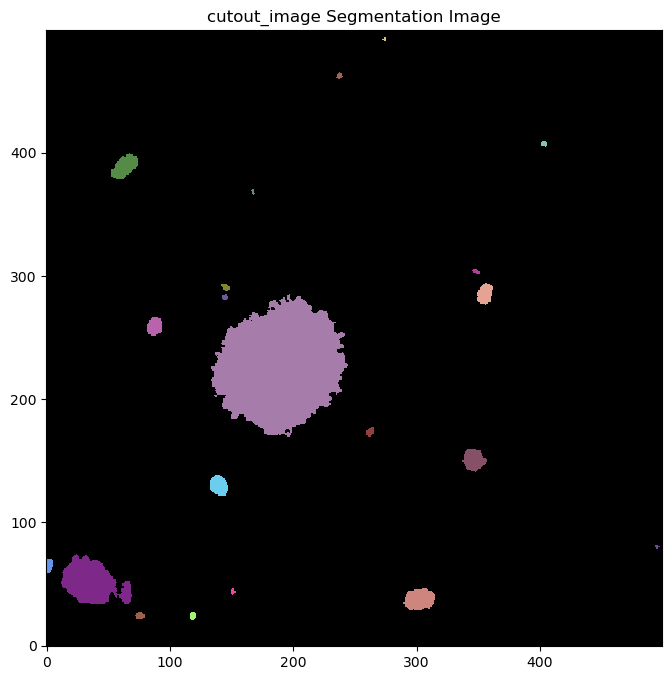

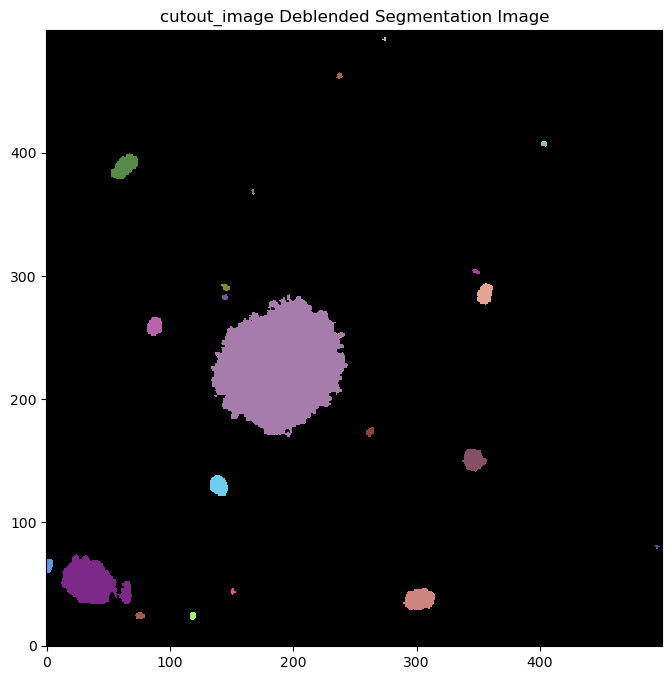

Deblending:   0%|          | 0/3248 [00:00<?, ?it/s]

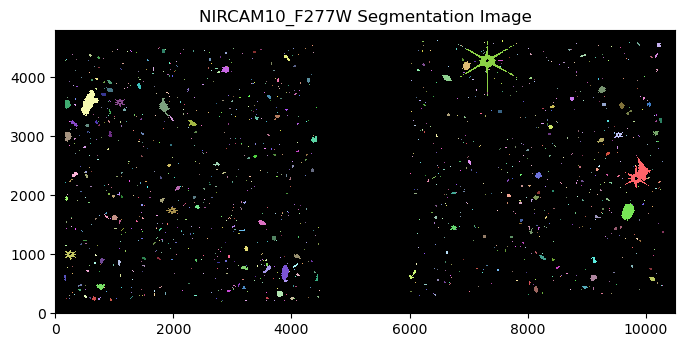

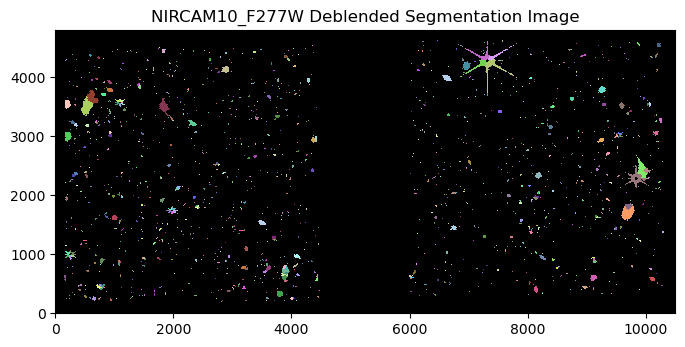

{'cutout_image': 21, 'NIRCAM10_F277W': 4250}

In [13]:
process_images_number_counts([cutout, image], 1.5, 5, 16, 0.1, labels=None, connectivity=8, mode='exponential', 
                             smooth_data=True, kernel_name='Tophat', smooth_fwhm=3, kernel_size=5, relabel=True, nproc=1, 
                             progress_bar=True, show_plots=True)

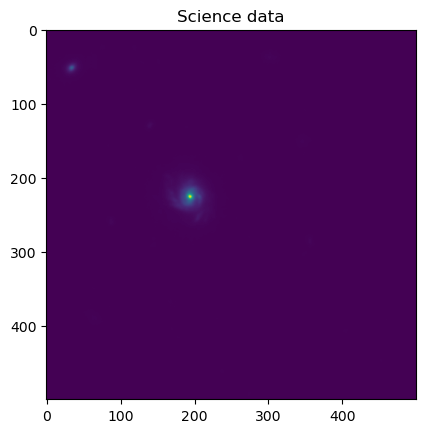

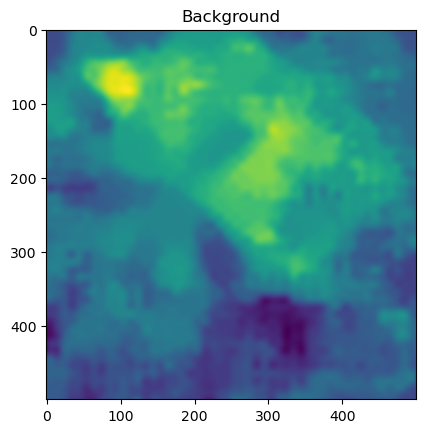

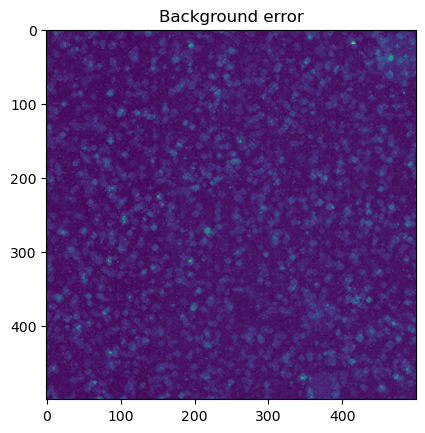

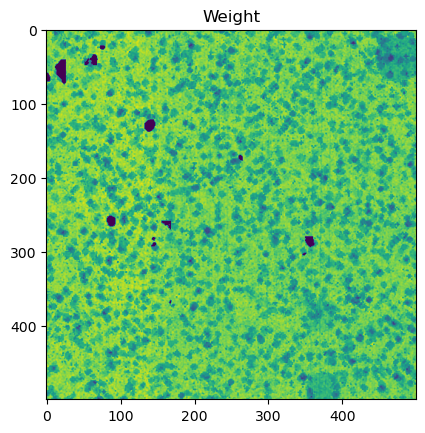

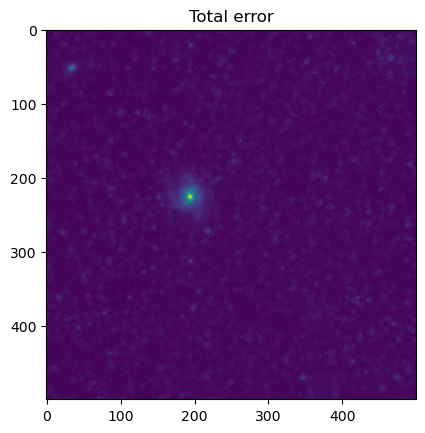

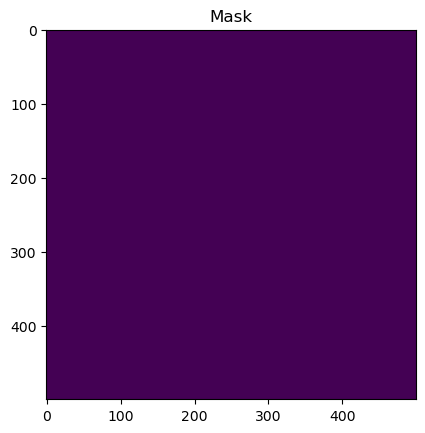

In [14]:
import matplotlib.pyplot as plt

plt.imshow(cutout.sci)
plt.title('Science data')
plt.show()

plt.imshow(cutout.bkg)
plt.title('Background')
plt.show()

plt.imshow(cutout.bkg_err)
plt.title('Background error')
plt.show()

plt.imshow(cutout.wht)
plt.title('Weight')
plt.show()

plt.imshow(cutout.err)
plt.title('Total error')
plt.show()

plt.imshow(cutout.mask)
plt.title('Mask')
plt.show()

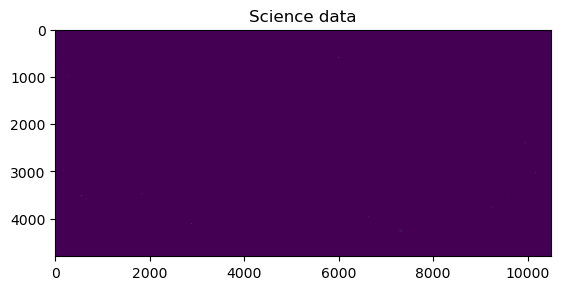

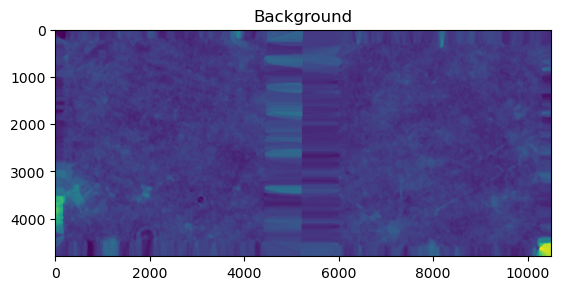

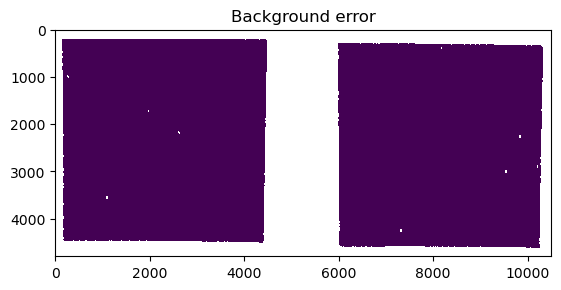

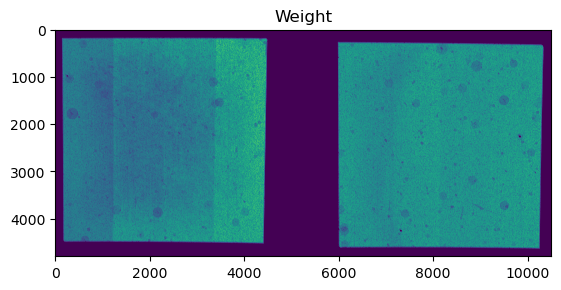

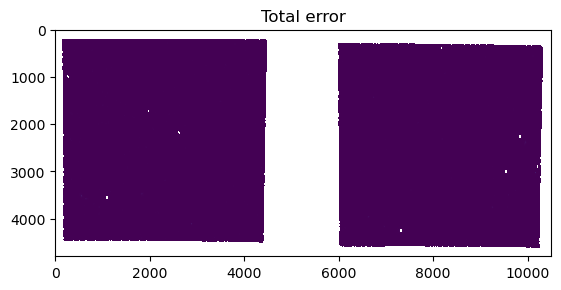

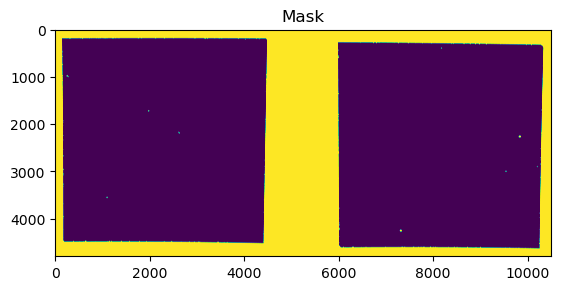

In [15]:
import matplotlib.pyplot as plt

plt.imshow(image.sci)
plt.title('Science data')
plt.show()

plt.imshow(image.bkg)
plt.title('Background')
plt.show()

plt.imshow(image.bkg_err)
plt.title('Background error')
plt.show()

plt.imshow(image.wht)
plt.title('Weight')
plt.show()

plt.imshow(image.err)
plt.title('Total error')
plt.show()

plt.imshow(image.mask)
plt.title('Mask')
plt.show()